Curva PR

Tracemos los valores de las métricas y veamos cómo responde la curva al cambio de umbral.
En la gráfica, el valor de precisión se traza verticalmente y recall, horizontalmente. Una curva trazada a partir de los valores de Precisión y Recall se denomina curva PR. Cuanto más alta sea la curva, mejor será el modelo.

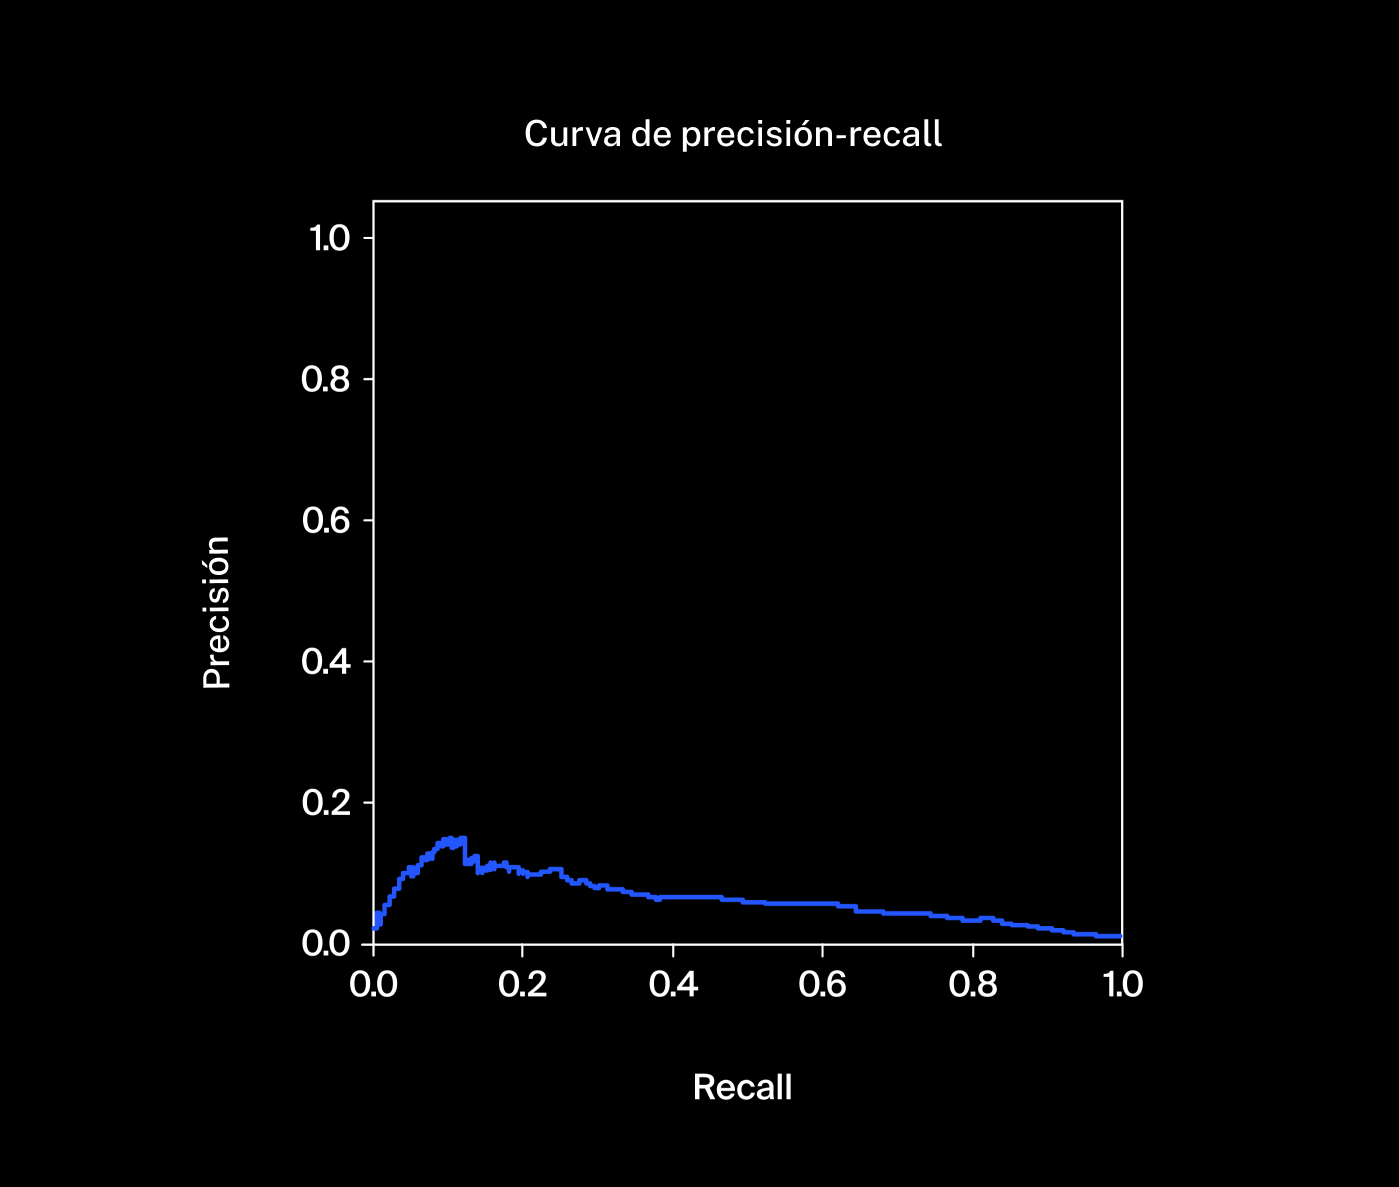

¿Quieres saber cómo se obtiene la curva? Aquí tienes el código:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

TVP y TFP

No puedes calcular la precisión cuando no hay observaciones positivas. Consideremos las métricas que no implican dividir entre cero.
Antes de avanzar, definamos algunos términos importantes.

Tasa de verdaderos positivos, o TVP, es el resultado de las respuestas VP divididas entre todas las respuestas positivas. Aquí está la fórmula, donde P son todas las respuestas positivas:

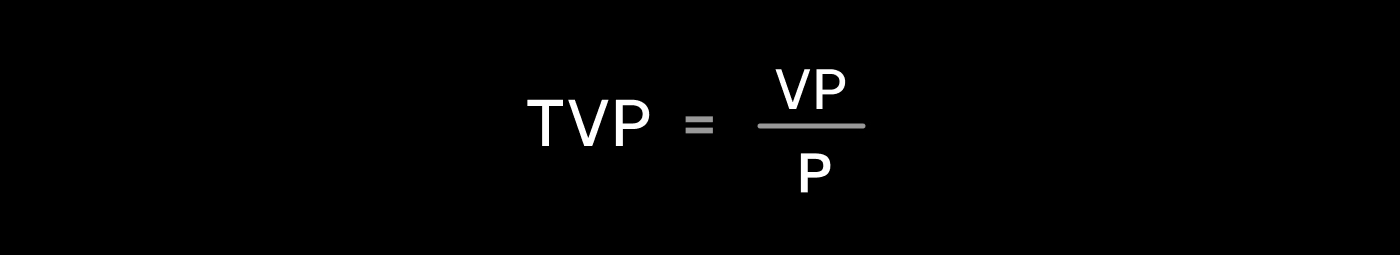

La Tasa de falsos positivos, o TFP, es el resultado de las respuestas FP divididas entre todas las respuestas negativas. Se calcula usando una fórmula similar, donde N son todas las respuestas negativas:

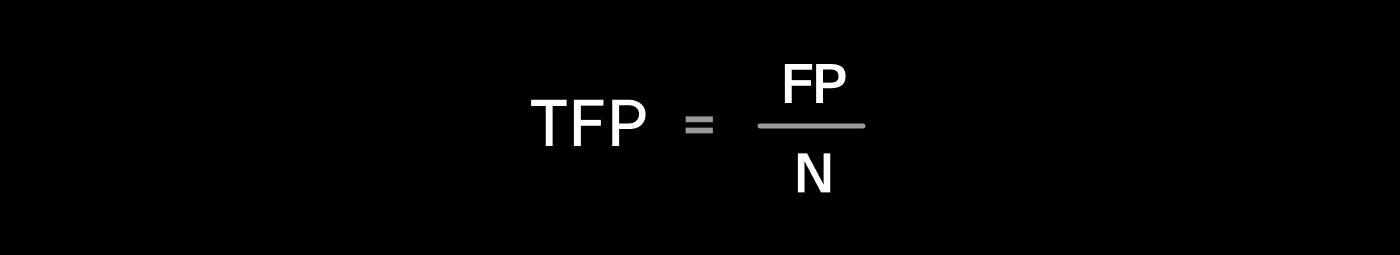

En ambas métricas, los denominadores son valores fijos que no cambian con ajustes en el modelo, por lo que no existe riesgo de división entre cero.


Pregunta

1. ¿Cómo afectará la disminución del umbral TFP en una regresión logística?

Respuesta: TFP aumentará

¡Correcto! El número de respuestas falsas positivas es proporcional al número de todas las respuestas negativas.

2. ¿Cómo afectará la disminución del umbral TVP en una regresión logística?

Respuesta: TVP aumentará

¡Correcto! El número de respuestas verdaderas positivas es proporcional al número de todas las respuestas positivas.

Curva ROC

Hemos observado un enfrentamiento entre la Tasa de Verdaderos Positivos (TVP) y la Tasa de Falsos Positivos (TFP). Ahora, vamos a visualizar esta relación trazando la curva ROC.

Colocamos los valores de la tasa de falsos positivos (TFP) a lo largo del eje horizontal y los valores de la tasa de verdaderos positivos (TVP) a lo largo del eje vertical. Luego iteramos los valores del umbral de regresión logística y trazamos una curva. Se llama la curva ROC (del inglés, Característica Operativa del Receptor,* un término de la teoría del procesamiento de señales).

Para un modelo que siempre responde aleatoriamente, la curva ROC es una línea diagonal que va desde la esquina inferior izquierda hasta la esquina superior derecha. Cuanto más se aleje la curva ROC de esta línea diagonal hacia la esquina superior izquierda, mejor será el modelo, ya que indica una mayor relación TVP-TFP. 

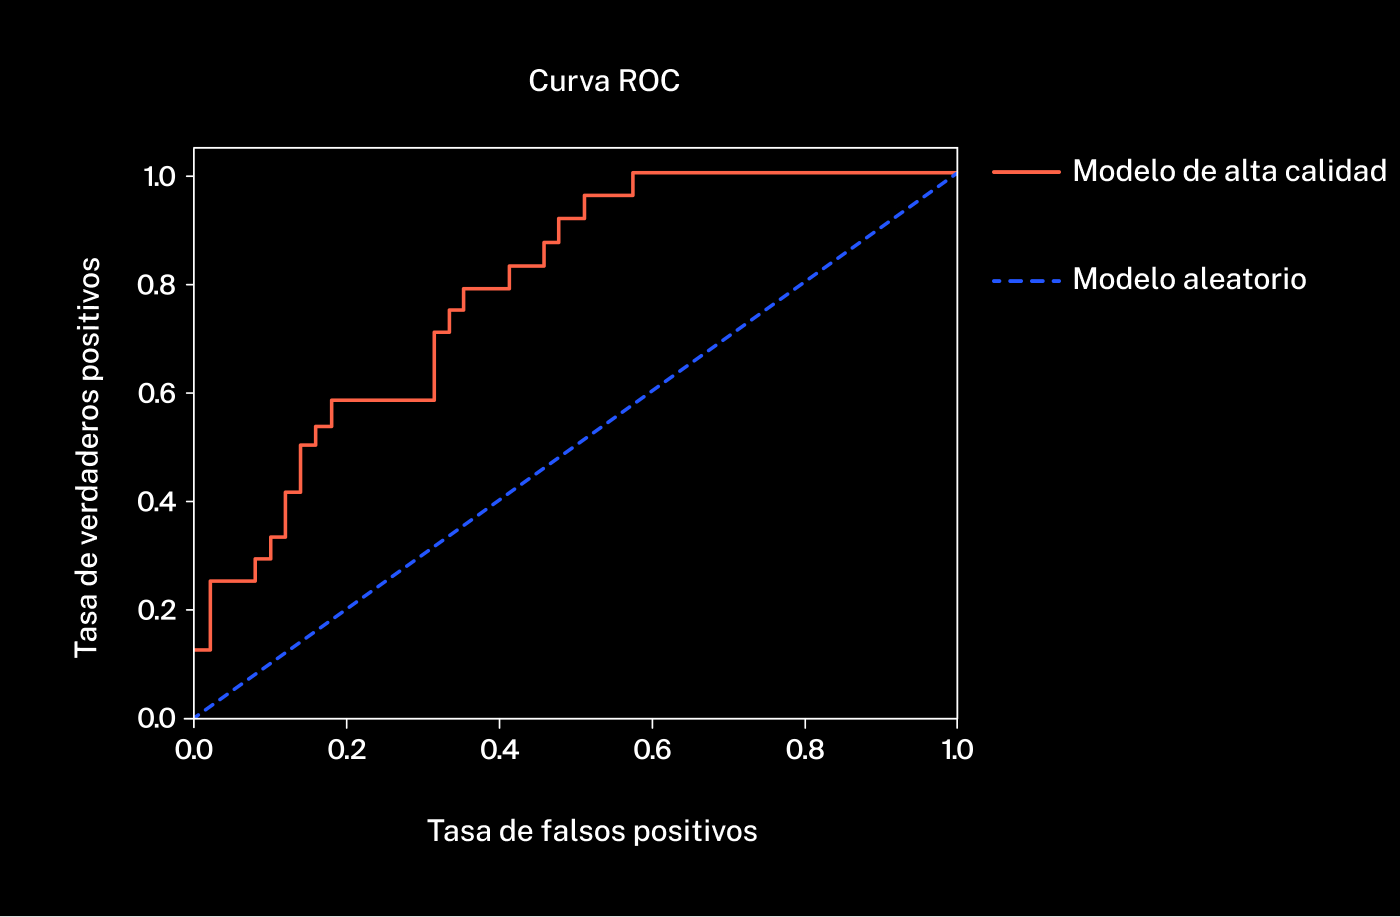

Para encontrar cuánto difiere nuestro modelo del modelo aleatorio, calculemos el valor AUC-ROC (Área Bajo la Curva ROC). Esta es una nueva métrica de evaluación con valores en el rango de 0 a 1. El valor AUC-ROC para un modelo aleatorio es 0.5.

Podemos trazar una curva ROC con la variable roc_curve() del módulo sklearn.metrics:

from sklearn.metrics import roc_curve

Esta toma los valores objetivo y las probabilidades de clase positivas, supera diferentes umbrales y devuelve tres listas: valores TFP, valores TVP y los umbrales que superó.

fpr, tpr, thresholds = roc_curve(target, probabilities)

Tracemos una gráfica para las variables tfp y tvp.



Ejercicios

1. Haz una curva ROC para la regresión logística y trázala en la gráfica. Sigue las instrucciones en el precódigo.

También agregamos la curva ROC del modelo aleatorio al precódigo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)# < escribe el código aquí >

plt.figure()

# < traza la gráfica >

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot(fpr,tpr, linestyle='--')

# < utiliza las funciones plt.xlim() y plt.ylim() para
#   establecer el límite para los ejes de 0 a 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# < utiliza las funciones plt.xlabel() y plt.ylabel() para
#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
# < agrega el encabezado "Curva ROC" con la función plt.title() >
plt.title('Curva ROC')
plt.show()

¡Es correcto!

¿Qué podemos decir de esta gráfica? Una línea recta no siempre es la mejor manera. La curva nos ayudará a encontrar la mejor proporción de TFP y TVP para nuestra tarea.

2. Calcula el AUC-ROC para la regresión logística. Encuentra la función adecuada en la documentación de sklearn, así como la descripción de cómo funciona. Importa la función. Muestra en la pantalla el valor AUC-ROC.

La función se llama roc_auc_score():

from sklearn.metrics import roc_auc_score

A diferencia de otras métricas, toma probabilidades de clase "1" en lugar de predicciones.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

# separa datos
target = data['Claim']
features = data.drop('Claim', axis=1)

# divide el conjunto de datos
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
# Entrena modelo
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
# predice las probabilidades
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# calcula las metricas ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
# calcula el auc_roc
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

#0.8222607565781999

¡Es correcto!

El resultado es mejor que el modelo aleatorio, pero todavía está lejos de ser perfecto (AUC-ROC = 1).

Conclusión

¡Ahora sabemos cómo luchar contra el desequilibrio de clases!
En este capítulo aprendiste:

- Cómo usar el ajuste de peso de clase, el sobremuestreo y el submuestreo para mejorar las métricas de evaluación
- Qué es la curva ROC y cómo se puede calcular el valor AUC-ROC
- Cómo establecer los umbrales de clasificación para equilibrar la relación TVP/TFP